In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical #for one hot encoding
from keras import optimizers

#To make it compatible with jupyter notebook
%matplotlib inline
# Fixing random state for reproducibility\n
np.random.seed(1)

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import Model
from keras.utils import np_utils

## Load DataSet

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

In [0]:
train_set_X = train_features
train_set_Y = train_labels
test_set_X = test_features
test_set_Y = test_labels

In [5]:
def print_shapes_of_dataset():
  print("Train X shape: \t" + str(train_set_X.shape))
  print("Train Y shape: \t" + str(train_set_Y.shape))
  print("Test X shape: \t" + str(test_set_X.shape))
  print("Test Y shape: \t" + str(test_set_Y.shape))

print_shapes_of_dataset()

Train X shape: 	(50000, 32, 32, 3)
Train Y shape: 	(50000, 1)
Test X shape: 	(10000, 32, 32, 3)
Test Y shape: 	(10000, 1)


In [6]:
input_shape = train_set_X.shape[1:]
print(input_shape)

(32, 32, 3)


In [7]:
# one hot encode
encoded_train_Y = to_categorical(train_set_Y)
encoded_train_Y = encoded_train_Y.reshape(encoded_train_Y.shape[0], encoded_train_Y.shape[1])

print(encoded_train_Y.shape)

# one hot encode
encoded_test_Y = to_categorical(test_set_Y)
encoded_test_Y = encoded_test_Y.reshape(encoded_test_Y.shape[0], encoded_test_Y.shape[1])

print(encoded_test_Y.shape)

(50000, 10)
(10000, 10)


## Own Network Architecture

In [0]:
#Define model
model = Sequential()

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_1'))

model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_2'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_1'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_3'))

model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_4'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_2'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(128, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_5'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name = 'max_pool_layer_3'))

#Add a layer that will flatten out the tensor
model.add(Flatten(name = 'flatten_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(1024, activation = 'relu', name='dense_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(encoded_train_Y.shape[1], activation = 'softmax',name='final_layer'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer_1 (Conv2D)        (None, 30, 30, 32)        896       
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pool_layer_1 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv_layer_3 (Conv2D)        (None, 12, 12, 64)        18496     
_________________________________________________________________
conv_layer_4 (Conv2D)        (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pool_layer_2 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv_layer_5 (Conv2D)        (None, 3, 3, 128)         73856     
__________

## Training Model

In [0]:
#Compile the model tell which loss to use and the optimizer and a evaluation metric if any
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])

In [11]:
history_1 = model.fit(train_set_X, encoded_train_Y,
          batch_size = 100,
          epochs = 100,
          validation_data = (test_set_X, encoded_test_Y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 26s 514us/step - loss: 1.6369 - acc: 0.4098 - val_loss: 1.3746 - val_acc: 0.5007
Epoch 2/100
37600/50000 [=====================>........] - ETA: 5s - loss: 1.2682 - acc: 0.5495

50000/50000 [==============================] - 23s 454us/step - loss: 1.2485 - acc: 0.5566 - val_loss: 1.1530 - val_acc: 0.5993
Epoch 3/100
50000/50000 [==============================] - 23s 459us/step - loss: 1.0921 - acc: 0.6158 - val_loss: 1.0942 - val_acc: 0.6216
Epoch 4/100
16800/50000 [=========>....................] - ETA: 14s - loss: 0.9868 - acc: 0.6507

50000/50000 [==============================] - 23s 457us/step - loss: 0.9838 - acc: 0.6545 - val_loss: 1.1146 - val_acc: 0.6226
Epoch 5/100
50000/50000 [==============================] - 23s 461us/step - loss: 0.9017 - acc: 0.6846 - val_loss: 1.0989 - val_acc: 0.6300
Epoch 6/100
11800/50000 [======>.......................] - ETA: 16s - loss: 0.7898 - acc: 0.7242

50000/50000 [==============================] - 23s 457us/step - loss: 0.8184 - acc: 0.7139 - val_loss: 1.0232 - val_acc: 0.6530
Epoch 7/100
50000/50000 [==============================] - 23s 467us/step - loss: 0.7603 - acc: 0.7343 - val_loss: 1.0319 - val_acc: 0.6600
Epoch 8/100
 9500/50000 [====>.........................] - ETA: 16s - loss: 0.6660 - acc: 0.7677

50000/50000 [==============================] - 23s 457us/step - loss: 0.7012 - acc: 0.7547 - val_loss: 1.0053 - val_acc: 0.6765
Epoch 9/100
50000/50000 [==============================] - 23s 464us/step - loss: 0.6474 - acc: 0.7736 - val_loss: 1.0081 - val_acc: 0.6839
Epoch 10/100
 9700/50000 [====>.........................] - ETA: 17s - loss: 0.5187 - acc: 0.8190

50000/50000 [==============================] - 23s 462us/step - loss: 0.5964 - acc: 0.7893 - val_loss: 1.0662 - val_acc: 0.6727
Epoch 11/100
50000/50000 [==============================] - 23s 457us/step - loss: 0.5453 - acc: 0.8069 - val_loss: 1.1611 - val_acc: 0.6613
Epoch 12/100
 9800/50000 [====>.........................] - ETA: 17s - loss: 0.4684 - acc: 0.8357

50000/50000 [==============================] - 23s 464us/step - loss: 0.5239 - acc: 0.8148 - val_loss: 1.1130 - val_acc: 0.6533
Epoch 13/100
50000/50000 [==============================] - 23s 455us/step - loss: 0.4894 - acc: 0.8274 - val_loss: 1.1781 - val_acc: 0.6658
Epoch 14/100
 8700/50000 [====>.........................] - ETA: 18s - loss: 0.3735 - acc: 0.8680

50000/50000 [==============================] - 23s 463us/step - loss: 0.4500 - acc: 0.8400 - val_loss: 1.2129 - val_acc: 0.6675
Epoch 15/100
50000/50000 [==============================] - 23s 454us/step - loss: 0.4342 - acc: 0.8473 - val_loss: 1.1874 - val_acc: 0.6758
Epoch 16/100
 9400/50000 [====>.........................] - ETA: 17s - loss: 0.3385 - acc: 0.8786

50000/50000 [==============================] - 23s 465us/step - loss: 0.3871 - acc: 0.8632 - val_loss: 1.3797 - val_acc: 0.6704
Epoch 17/100
50000/50000 [==============================] - 23s 458us/step - loss: 0.3775 - acc: 0.8669 - val_loss: 1.3444 - val_acc: 0.6740
Epoch 18/100
 9100/50000 [====>.........................] - ETA: 18s - loss: 0.2730 - acc: 0.9046

50000/50000 [==============================] - 23s 467us/step - loss: 0.3516 - acc: 0.8762 - val_loss: 1.3151 - val_acc: 0.6650
Epoch 19/100
50000/50000 [==============================] - 23s 454us/step - loss: 0.3397 - acc: 0.8812 - val_loss: 1.4643 - val_acc: 0.6713
Epoch 20/100
10500/50000 [=====>........................] - ETA: 16s - loss: 0.2605 - acc: 0.9103

50000/50000 [==============================] - 23s 456us/step - loss: 0.3315 - acc: 0.8849 - val_loss: 1.4834 - val_acc: 0.6599
Epoch 21/100
50000/50000 [==============================] - 22s 448us/step - loss: 0.3124 - acc: 0.8914 - val_loss: 1.5005 - val_acc: 0.6667
Epoch 22/100
10500/50000 [=====>........................] - ETA: 17s - loss: 0.2268 - acc: 0.9227

50000/50000 [==============================] - 23s 456us/step - loss: 0.3105 - acc: 0.8928 - val_loss: 1.4937 - val_acc: 0.6708
Epoch 23/100
50000/50000 [==============================] - 23s 458us/step - loss: 0.3038 - acc: 0.8946 - val_loss: 1.5581 - val_acc: 0.6726
Epoch 24/100
10300/50000 [=====>........................] - ETA: 17s - loss: 0.2616 - acc: 0.9096

50000/50000 [==============================] - 23s 452us/step - loss: 0.2912 - acc: 0.9006 - val_loss: 1.5834 - val_acc: 0.6726
Epoch 25/100
50000/50000 [==============================] - 23s 456us/step - loss: 0.2851 - acc: 0.9022 - val_loss: 1.7648 - val_acc: 0.6586
Epoch 26/100
10900/50000 [=====>........................] - ETA: 16s - loss: 0.2639 - acc: 0.9091

50000/50000 [==============================] - 22s 449us/step - loss: 0.2848 - acc: 0.9026 - val_loss: 1.6646 - val_acc: 0.6613
Epoch 27/100
50000/50000 [==============================] - 23s 456us/step - loss: 0.2720 - acc: 0.9075 - val_loss: 1.6447 - val_acc: 0.6674
Epoch 28/100
10800/50000 [=====>........................] - ETA: 16s - loss: 0.1973 - acc: 0.9335

50000/50000 [==============================] - 22s 449us/step - loss: 0.2562 - acc: 0.9120 - val_loss: 1.7385 - val_acc: 0.6516
Epoch 29/100
50000/50000 [==============================] - 23s 457us/step - loss: 0.2706 - acc: 0.9093 - val_loss: 1.7139 - val_acc: 0.6648
Epoch 30/100
10600/50000 [=====>........................] - ETA: 16s - loss: 0.2270 - acc: 0.9213

50000/50000 [==============================] - 23s 451us/step - loss: 0.2609 - acc: 0.9130 - val_loss: 1.7535 - val_acc: 0.6613
Epoch 31/100
50000/50000 [==============================] - 23s 461us/step - loss: 0.2532 - acc: 0.9162 - val_loss: 1.7041 - val_acc: 0.6647
Epoch 32/100
10200/50000 [=====>........................] - ETA: 16s - loss: 0.2211 - acc: 0.9231

50000/50000 [==============================] - 22s 449us/step - loss: 0.2548 - acc: 0.9145 - val_loss: 1.8162 - val_acc: 0.6649
Epoch 33/100
50000/50000 [==============================] - 23s 457us/step - loss: 0.2540 - acc: 0.9160 - val_loss: 1.7656 - val_acc: 0.6648
Epoch 34/100
10200/50000 [=====>........................] - ETA: 16s - loss: 0.1652 - acc: 0.9421

50000/50000 [==============================] - 23s 456us/step - loss: 0.2274 - acc: 0.9243 - val_loss: 1.8861 - val_acc: 0.6603
Epoch 35/100
50000/50000 [==============================] - 23s 451us/step - loss: 0.2459 - acc: 0.9195 - val_loss: 1.8660 - val_acc: 0.6691
Epoch 36/100
10400/50000 [=====>........................] - ETA: 17s - loss: 0.1959 - acc: 0.9355

50000/50000 [==============================] - 23s 461us/step - loss: 0.2384 - acc: 0.9212 - val_loss: 1.9506 - val_acc: 0.6629
Epoch 37/100
50000/50000 [==============================] - 22s 448us/step - loss: 0.2439 - acc: 0.9210 - val_loss: 1.8721 - val_acc: 0.6636
Epoch 38/100
10800/50000 [=====>........................] - ETA: 17s - loss: 0.1510 - acc: 0.9482

50000/50000 [==============================] - 23s 456us/step - loss: 0.2152 - acc: 0.9294 - val_loss: 1.9774 - val_acc: 0.6481
Epoch 39/100
50000/50000 [==============================] - 23s 452us/step - loss: 0.2263 - acc: 0.9274 - val_loss: 1.8655 - val_acc: 0.6476
Epoch 40/100
11300/50000 [=====>........................] - ETA: 17s - loss: 0.2267 - acc: 0.9241

50000/50000 [==============================] - 23s 453us/step - loss: 0.2472 - acc: 0.9202 - val_loss: 2.0242 - val_acc: 0.6484
Epoch 41/100
50000/50000 [==============================] - 23s 454us/step - loss: 0.2312 - acc: 0.9242 - val_loss: 2.0752 - val_acc: 0.6606
Epoch 42/100
11300/50000 [=====>........................] - ETA: 16s - loss: 0.1417 - acc: 0.9522

50000/50000 [==============================] - 23s 459us/step - loss: 0.2060 - acc: 0.9335 - val_loss: 2.0399 - val_acc: 0.6645
Epoch 43/100
50000/50000 [==============================] - 23s 455us/step - loss: 0.2468 - acc: 0.9223 - val_loss: 1.9979 - val_acc: 0.6678
Epoch 44/100
 9900/50000 [====>.........................] - ETA: 17s - loss: 0.1506 - acc: 0.9517

50000/50000 [==============================] - 22s 449us/step - loss: 0.2284 - acc: 0.9272 - val_loss: 1.9528 - val_acc: 0.6632
Epoch 45/100
50000/50000 [==============================] - 23s 456us/step - loss: 0.2138 - acc: 0.9312 - val_loss: 2.0509 - val_acc: 0.6546
Epoch 46/100
10200/50000 [=====>........................] - ETA: 17s - loss: 0.1816 - acc: 0.9439

50000/50000 [==============================] - 22s 448us/step - loss: 0.1993 - acc: 0.9355 - val_loss: 2.1202 - val_acc: 0.6611
Epoch 47/100
50000/50000 [==============================] - 23s 452us/step - loss: 0.2321 - acc: 0.9280 - val_loss: 1.9935 - val_acc: 0.6555
Epoch 48/100
11100/50000 [=====>........................] - ETA: 16s - loss: 0.2208 - acc: 0.9321

50000/50000 [==============================] - 23s 453us/step - loss: 0.2417 - acc: 0.9232 - val_loss: 2.1763 - val_acc: 0.6599
Epoch 49/100
50000/50000 [==============================] - 23s 453us/step - loss: 0.2195 - acc: 0.9314 - val_loss: 2.0776 - val_acc: 0.6591
Epoch 50/100
11900/50000 [======>.......................] - ETA: 15s - loss: 0.1789 - acc: 0.9442

50000/50000 [==============================] - 23s 451us/step - loss: 0.2164 - acc: 0.9316 - val_loss: 2.1953 - val_acc: 0.6678
Epoch 51/100
50000/50000 [==============================] - 23s 452us/step - loss: 0.2115 - acc: 0.9347 - val_loss: 2.1298 - val_acc: 0.6526
Epoch 52/100
11500/50000 [=====>........................] - ETA: 15s - loss: 0.1662 - acc: 0.9481

50000/50000 [==============================] - 22s 448us/step - loss: 0.2221 - acc: 0.9306 - val_loss: 2.1704 - val_acc: 0.6510
Epoch 53/100
50000/50000 [==============================] - 23s 459us/step - loss: 0.2189 - acc: 0.9323 - val_loss: 2.1806 - val_acc: 0.6577
Epoch 54/100
11000/50000 [=====>........................] - ETA: 15s - loss: 0.1727 - acc: 0.9472

50000/50000 [==============================] - 22s 449us/step - loss: 0.2055 - acc: 0.9352 - val_loss: 2.1024 - val_acc: 0.6597
Epoch 55/100
50000/50000 [==============================] - 23s 459us/step - loss: 0.2153 - acc: 0.9333 - val_loss: 2.2202 - val_acc: 0.6496
Epoch 56/100
10900/50000 [=====>........................] - ETA: 16s - loss: 0.1982 - acc: 0.9372

50000/50000 [==============================] - 23s 454us/step - loss: 0.2121 - acc: 0.9332 - val_loss: 2.0343 - val_acc: 0.6605
Epoch 57/100
50000/50000 [==============================] - 23s 451us/step - loss: 0.2109 - acc: 0.9342 - val_loss: 2.1930 - val_acc: 0.6512
Epoch 58/100
11000/50000 [=====>........................] - ETA: 16s - loss: 0.1676 - acc: 0.9462

50000/50000 [==============================] - 23s 455us/step - loss: 0.2114 - acc: 0.9345 - val_loss: 2.2869 - val_acc: 0.6577
Epoch 59/100
50000/50000 [==============================] - 23s 451us/step - loss: 0.2164 - acc: 0.9334 - val_loss: 2.2188 - val_acc: 0.6638
Epoch 60/100
11100/50000 [=====>........................] - ETA: 16s - loss: 0.2183 - acc: 0.9325

50000/50000 [==============================] - 23s 454us/step - loss: 0.2119 - acc: 0.9352 - val_loss: 2.2122 - val_acc: 0.6507
Epoch 61/100
50000/50000 [==============================] - 22s 442us/step - loss: 0.1985 - acc: 0.9371 - val_loss: 2.1669 - val_acc: 0.6629
Epoch 62/100
12000/50000 [======>.......................] - ETA: 16s - loss: 0.1449 - acc: 0.9527

50000/50000 [==============================] - 23s 454us/step - loss: 0.2162 - acc: 0.9342 - val_loss: 2.2913 - val_acc: 0.6563
Epoch 63/100
50000/50000 [==============================] - 22s 447us/step - loss: 0.2175 - acc: 0.9338 - val_loss: 2.0182 - val_acc: 0.6642
Epoch 64/100
11600/50000 [=====>........................] - ETA: 16s - loss: 0.1615 - acc: 0.9490

50000/50000 [==============================] - 23s 450us/step - loss: 0.1934 - acc: 0.9408 - val_loss: 2.1747 - val_acc: 0.6591
Epoch 65/100
50000/50000 [==============================] - 22s 448us/step - loss: 0.2009 - acc: 0.9392 - val_loss: 2.1868 - val_acc: 0.6602
Epoch 66/100
11500/50000 [=====>........................] - ETA: 16s - loss: 0.2140 - acc: 0.9337

50000/50000 [==============================] - 22s 450us/step - loss: 0.2223 - acc: 0.9338 - val_loss: 2.1943 - val_acc: 0.6640
Epoch 67/100
50000/50000 [==============================] - 23s 453us/step - loss: 0.1934 - acc: 0.9412 - val_loss: 2.2870 - val_acc: 0.6621
Epoch 68/100
11100/50000 [=====>........................] - ETA: 16s - loss: 0.1947 - acc: 0.9404

50000/50000 [==============================] - 22s 443us/step - loss: 0.2017 - acc: 0.9396 - val_loss: 2.4162 - val_acc: 0.6642
Epoch 69/100
50000/50000 [==============================] - 23s 450us/step - loss: 0.2092 - acc: 0.9387 - val_loss: 2.2996 - val_acc: 0.6549
Epoch 70/100
11800/50000 [======>.......................] - ETA: 15s - loss: 0.1698 - acc: 0.9476

50000/50000 [==============================] - 22s 442us/step - loss: 0.2050 - acc: 0.9373 - val_loss: 2.1101 - val_acc: 0.6656
Epoch 71/100
50000/50000 [==============================] - 23s 455us/step - loss: 0.2139 - acc: 0.9366 - val_loss: 2.2404 - val_acc: 0.6633
Epoch 72/100
11600/50000 [=====>........................] - ETA: 15s - loss: 0.1457 - acc: 0.9546

50000/50000 [==============================] - 22s 446us/step - loss: 0.2004 - acc: 0.9407 - val_loss: 2.3354 - val_acc: 0.6641
Epoch 73/100
50000/50000 [==============================] - 23s 454us/step - loss: 0.2026 - acc: 0.9395 - val_loss: 2.2441 - val_acc: 0.6576
Epoch 74/100
11700/50000 [======>.......................] - ETA: 15s - loss: 0.1658 - acc: 0.9495

50000/50000 [==============================] - 22s 443us/step - loss: 0.2091 - acc: 0.9387 - val_loss: 2.2635 - val_acc: 0.6541
Epoch 75/100
50000/50000 [==============================] - 23s 453us/step - loss: 0.2095 - acc: 0.9376 - val_loss: 2.1896 - val_acc: 0.6621
Epoch 76/100
11900/50000 [======>.......................] - ETA: 15s - loss: 0.1686 - acc: 0.9497

50000/50000 [==============================] - 22s 448us/step - loss: 0.2020 - acc: 0.9404 - val_loss: 2.1106 - val_acc: 0.6628
Epoch 77/100
50000/50000 [==============================] - 22s 448us/step - loss: 0.1877 - acc: 0.9447 - val_loss: 2.3471 - val_acc: 0.6451
Epoch 78/100
11400/50000 [=====>........................] - ETA: 16s - loss: 0.1656 - acc: 0.9507

50000/50000 [==============================] - 23s 451us/step - loss: 0.2010 - acc: 0.9415 - val_loss: 2.3094 - val_acc: 0.6573
Epoch 79/100
50000/50000 [==============================] - 22s 449us/step - loss: 0.2018 - acc: 0.9400 - val_loss: 2.3518 - val_acc: 0.6602
Epoch 80/100
11200/50000 [=====>........................] - ETA: 16s - loss: 0.1819 - acc: 0.9470

50000/50000 [==============================] - 23s 453us/step - loss: 0.1953 - acc: 0.9442 - val_loss: 2.2964 - val_acc: 0.6607
Epoch 81/100
50000/50000 [==============================] - 22s 448us/step - loss: 0.2065 - acc: 0.9381 - val_loss: 2.3864 - val_acc: 0.6511
Epoch 82/100
10900/50000 [=====>........................] - ETA: 17s - loss: 0.1871 - acc: 0.9438

50000/50000 [==============================] - 23s 457us/step - loss: 0.2087 - acc: 0.9386 - val_loss: 2.5275 - val_acc: 0.6486
Epoch 83/100
50000/50000 [==============================] - 22s 448us/step - loss: 0.2065 - acc: 0.9396 - val_loss: 2.4135 - val_acc: 0.6511
Epoch 84/100
12300/50000 [======>.......................] - ETA: 16s - loss: 0.1832 - acc: 0.9482

50000/50000 [==============================] - 23s 458us/step - loss: 0.1867 - acc: 0.9458 - val_loss: 2.2211 - val_acc: 0.6717
Epoch 85/100
50000/50000 [==============================] - 23s 451us/step - loss: 0.1846 - acc: 0.9456 - val_loss: 2.3157 - val_acc: 0.6628
Epoch 86/100
10700/50000 [=====>........................] - ETA: 17s - loss: 0.1711 - acc: 0.9507

50000/50000 [==============================] - 23s 454us/step - loss: 0.2147 - acc: 0.9382 - val_loss: 2.2465 - val_acc: 0.6565
Epoch 87/100
50000/50000 [==============================] - 23s 454us/step - loss: 0.1942 - acc: 0.9438 - val_loss: 2.3611 - val_acc: 0.6636
Epoch 88/100
10400/50000 [=====>........................] - ETA: 17s - loss: 0.1788 - acc: 0.9474

50000/50000 [==============================] - 23s 457us/step - loss: 0.2028 - acc: 0.9414 - val_loss: 2.4439 - val_acc: 0.6623
Epoch 89/100
50000/50000 [==============================] - 23s 450us/step - loss: 0.2010 - acc: 0.9420 - val_loss: 2.3506 - val_acc: 0.6569
Epoch 90/100
11300/50000 [=====>........................] - ETA: 16s - loss: 0.1755 - acc: 0.9509

50000/50000 [==============================] - 23s 452us/step - loss: 0.1819 - acc: 0.9474 - val_loss: 2.5725 - val_acc: 0.6546
Epoch 91/100
50000/50000 [==============================] - 23s 458us/step - loss: 0.2035 - acc: 0.9415 - val_loss: 2.3873 - val_acc: 0.6626
Epoch 92/100
10900/50000 [=====>........................] - ETA: 16s - loss: 0.1821 - acc: 0.9484

50000/50000 [==============================] - 23s 452us/step - loss: 0.1878 - acc: 0.9457 - val_loss: 2.4458 - val_acc: 0.6514
Epoch 93/100
50000/50000 [==============================] - 23s 453us/step - loss: 0.2048 - acc: 0.9424 - val_loss: 2.3240 - val_acc: 0.6598
Epoch 94/100
11700/50000 [======>.......................] - ETA: 15s - loss: 0.1850 - acc: 0.9483

50000/50000 [==============================] - 22s 445us/step - loss: 0.2205 - acc: 0.9381 - val_loss: 2.2421 - val_acc: 0.6606
Epoch 95/100
50000/50000 [==============================] - 23s 452us/step - loss: 0.1777 - acc: 0.9492 - val_loss: 2.5646 - val_acc: 0.6611
Epoch 96/100
12000/50000 [======>.......................] - ETA: 15s - loss: 0.1970 - acc: 0.9463

50000/50000 [==============================] - 22s 449us/step - loss: 0.2133 - acc: 0.9417 - val_loss: 2.3593 - val_acc: 0.6439
Epoch 97/100
50000/50000 [==============================] - 23s 459us/step - loss: 0.1968 - acc: 0.9448 - val_loss: 2.3140 - val_acc: 0.6592
Epoch 98/100
11500/50000 [=====>........................] - ETA: 15s - loss: 0.1782 - acc: 0.9485

50000/50000 [==============================] - 23s 456us/step - loss: 0.1885 - acc: 0.9465 - val_loss: 2.2963 - val_acc: 0.6680
Epoch 99/100
50000/50000 [==============================] - 23s 451us/step - loss: 0.1894 - acc: 0.9449 - val_loss: 2.5265 - val_acc: 0.6578
Epoch 100/100
11000/50000 [=====>........................] - ETA: 16s - loss: 0.1629 - acc: 0.9536

50000/50000 [==============================] - 23s 452us/step - loss: 0.1833 - acc: 0.9483 - val_loss: 2.3076 - val_acc: 0.6668


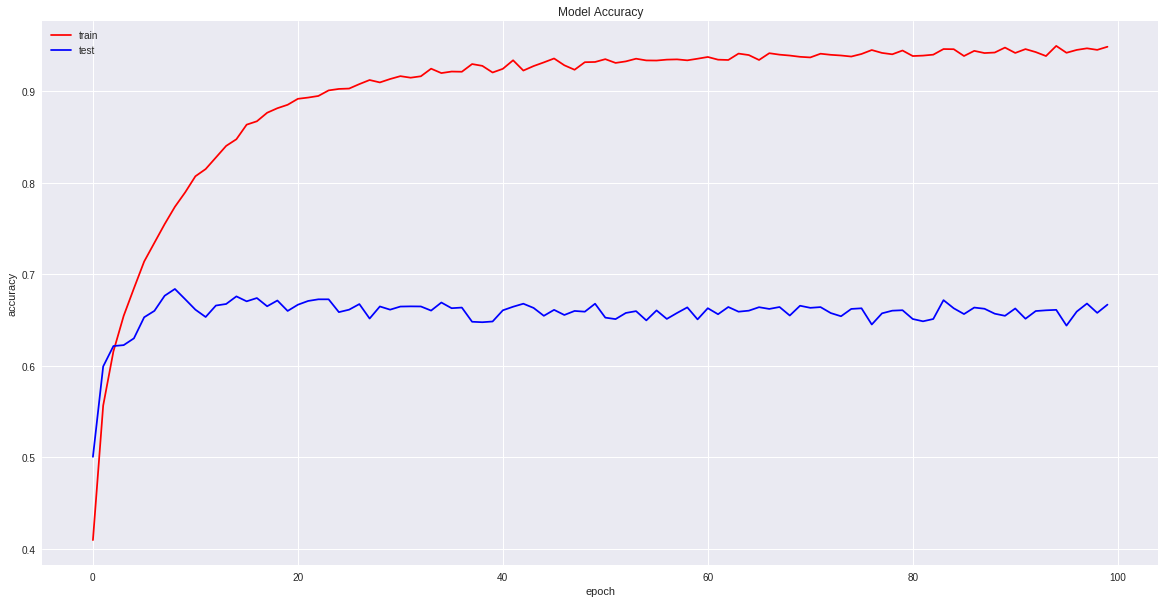

In [12]:
# list all data in history
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history_1.history['acc'], color = 'r')
plt.plot(history_1.history['val_acc'], color = 'b')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()


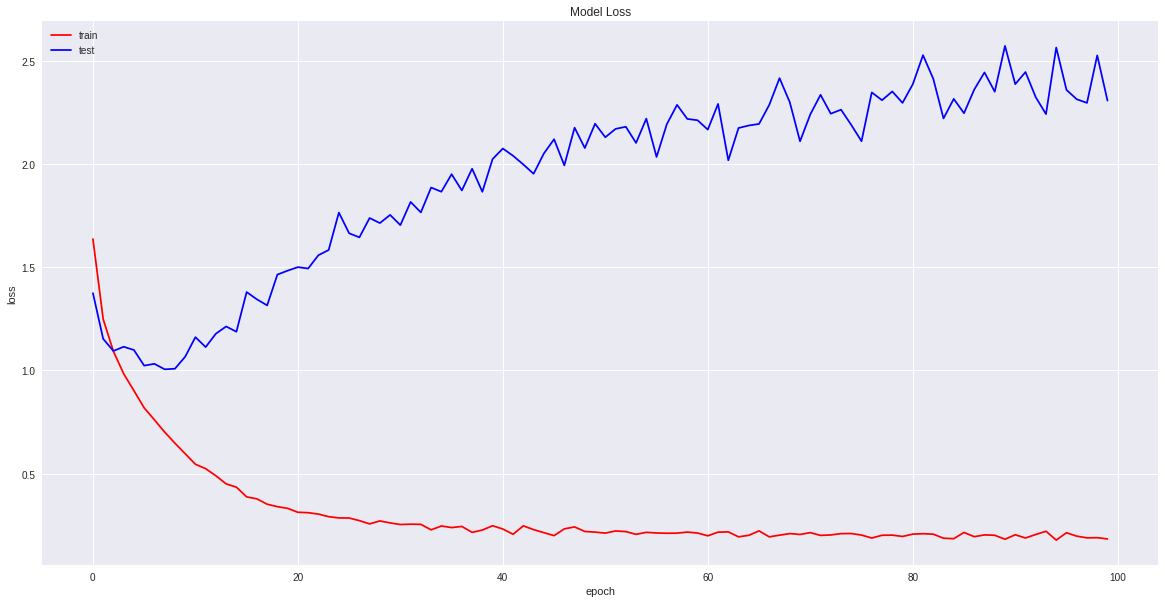

In [13]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history_1.history['loss'], color = 'r')
plt.plot(history_1.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()